# Step 1: Reading and Understanding the data

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the train csv file and displaying few rows

house = pd.read_csv('train.csv')
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# Describing numerical attributes

house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Dataset has 1460 rows and 81 columns

house.shape

(1460, 81)

## 2. Data Visualization

In [6]:
# Function to display numeric attributes.

def intplotfunc(house):
    int_plot = []
    for col in house.columns:
        if (house[col].dtype == 'float64') | (house[col].dtype == 'int64') :
            print(house[col].describe())
            int_plot.append(col)
    return int_plot
#print(int_plot)

In [7]:
# Function to display object type attributes.

def objplotfunc(house):
    obj_plot= []
    for col in house.columns:
        if house[col].dtype == 'object':
            print(house[col].value_counts(normalize = True))
            obj_plot.append(col)
    return obj_plot

In [8]:
# Function to visulaize categorical data with countplots

def countplots(attributes):
    plt.figure(figsize = (20,20))
    for i in enumerate(attributes):
        ax = plt.subplot(4,4, i[0]+1)
        sns.countplot(x=i[1], data= house_sub);
        plt.xticks(rotation = 90)

In [9]:
# Function to visulaize numeric data with boxplots

def boxplots(attributes):
    for i in enumerate(attributes):
        ax = plt.subplot(4, 4, i[0]+1)
        sns.boxplot(x=i[1], data= house_sub) ;

In [10]:
# Choosing subset of columns for EDA

house_sub = house[['MSSubClass','MSZoning','LotFrontage','LotArea','OverallQual','OverallCond','Street','YearBuilt','YrSold','Utilities','Neighborhood',
'Foundation','RoofStyle','ExterCond','Heating','GarageArea','BldgType','HouseStyle','BsmtQual','SalePrice','GarageFinish','GarageYrBlt',
'GarageType','BsmtExposure','BsmtFinType1','1stFlrSF','2ndFlrSF']]
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1. Univariate Analysis

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
Blmngtn    0.011644
MeadowV    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64
PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64
Gable      0.781507
Hip        0.195890
Flat       0.008

<Figure size 2880x2880 with 0 Axes>

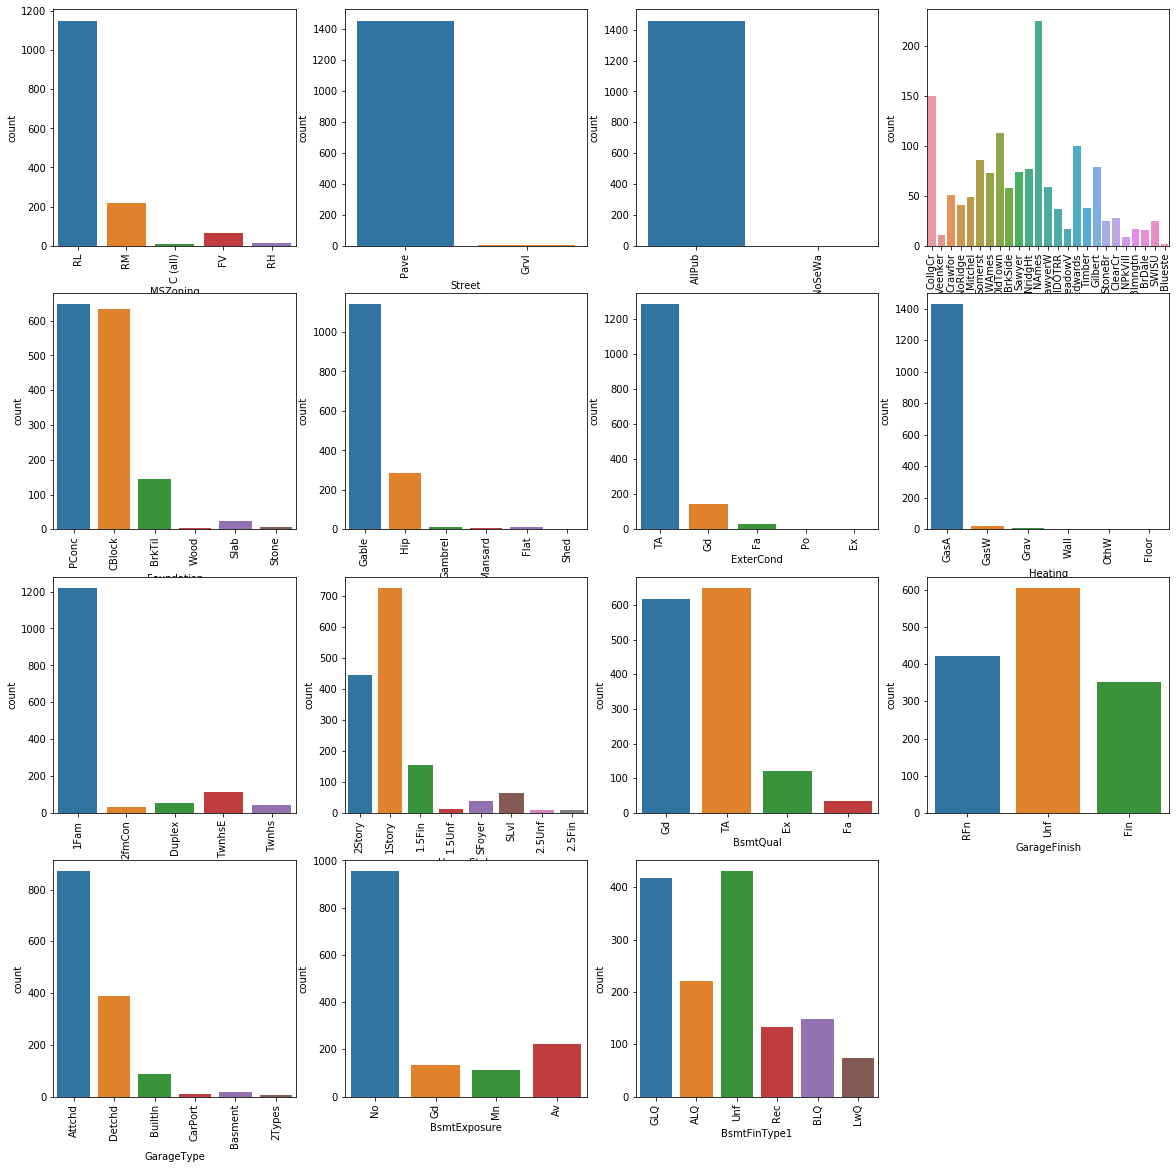

In [11]:
# Describe and display countplots for object variables

obj_plot = objplotfunc(house_sub)       
plt.figure(figsize=(40,40));
countplots(obj_plot)

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: Overall

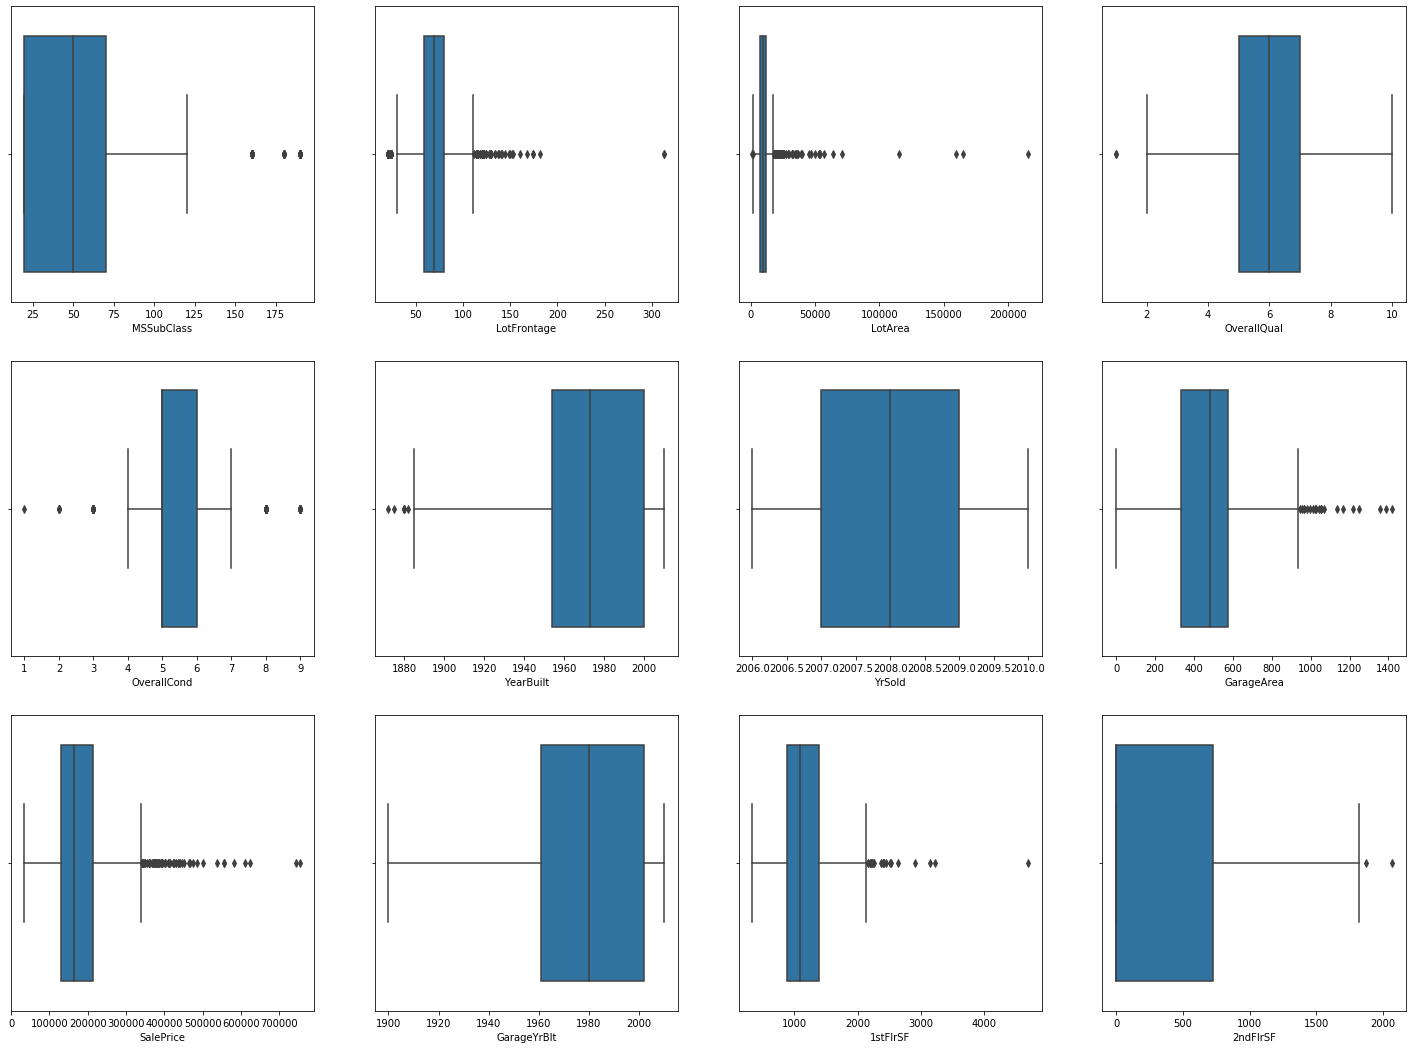

In [12]:
# Describe and display boxplots for numeric variables

plt.figure(figsize=(25,25))
intplot = intplotfunc(house_sub)
print(intplot)
boxplots(intplot)

From Univaraite Analysis It can be found that:
1. Most of Basments don't have a exposure. It could also be because no basement is present.
2. Most of the houses come with 1 Storey and Unfinished Basement Type
3. Most of the houses come with Unfinished Garage Type and Unfinished Basement Type
4. Lot of properties have Paved Street in Adjacent
5. Lot Area column is having a lot of outliers. Median being 12000.
6. Median of GarageArea is around 500 sq ft.
7. OverAllQual median is 6 with outliers on either side.

### 2. Bivariate Analysis

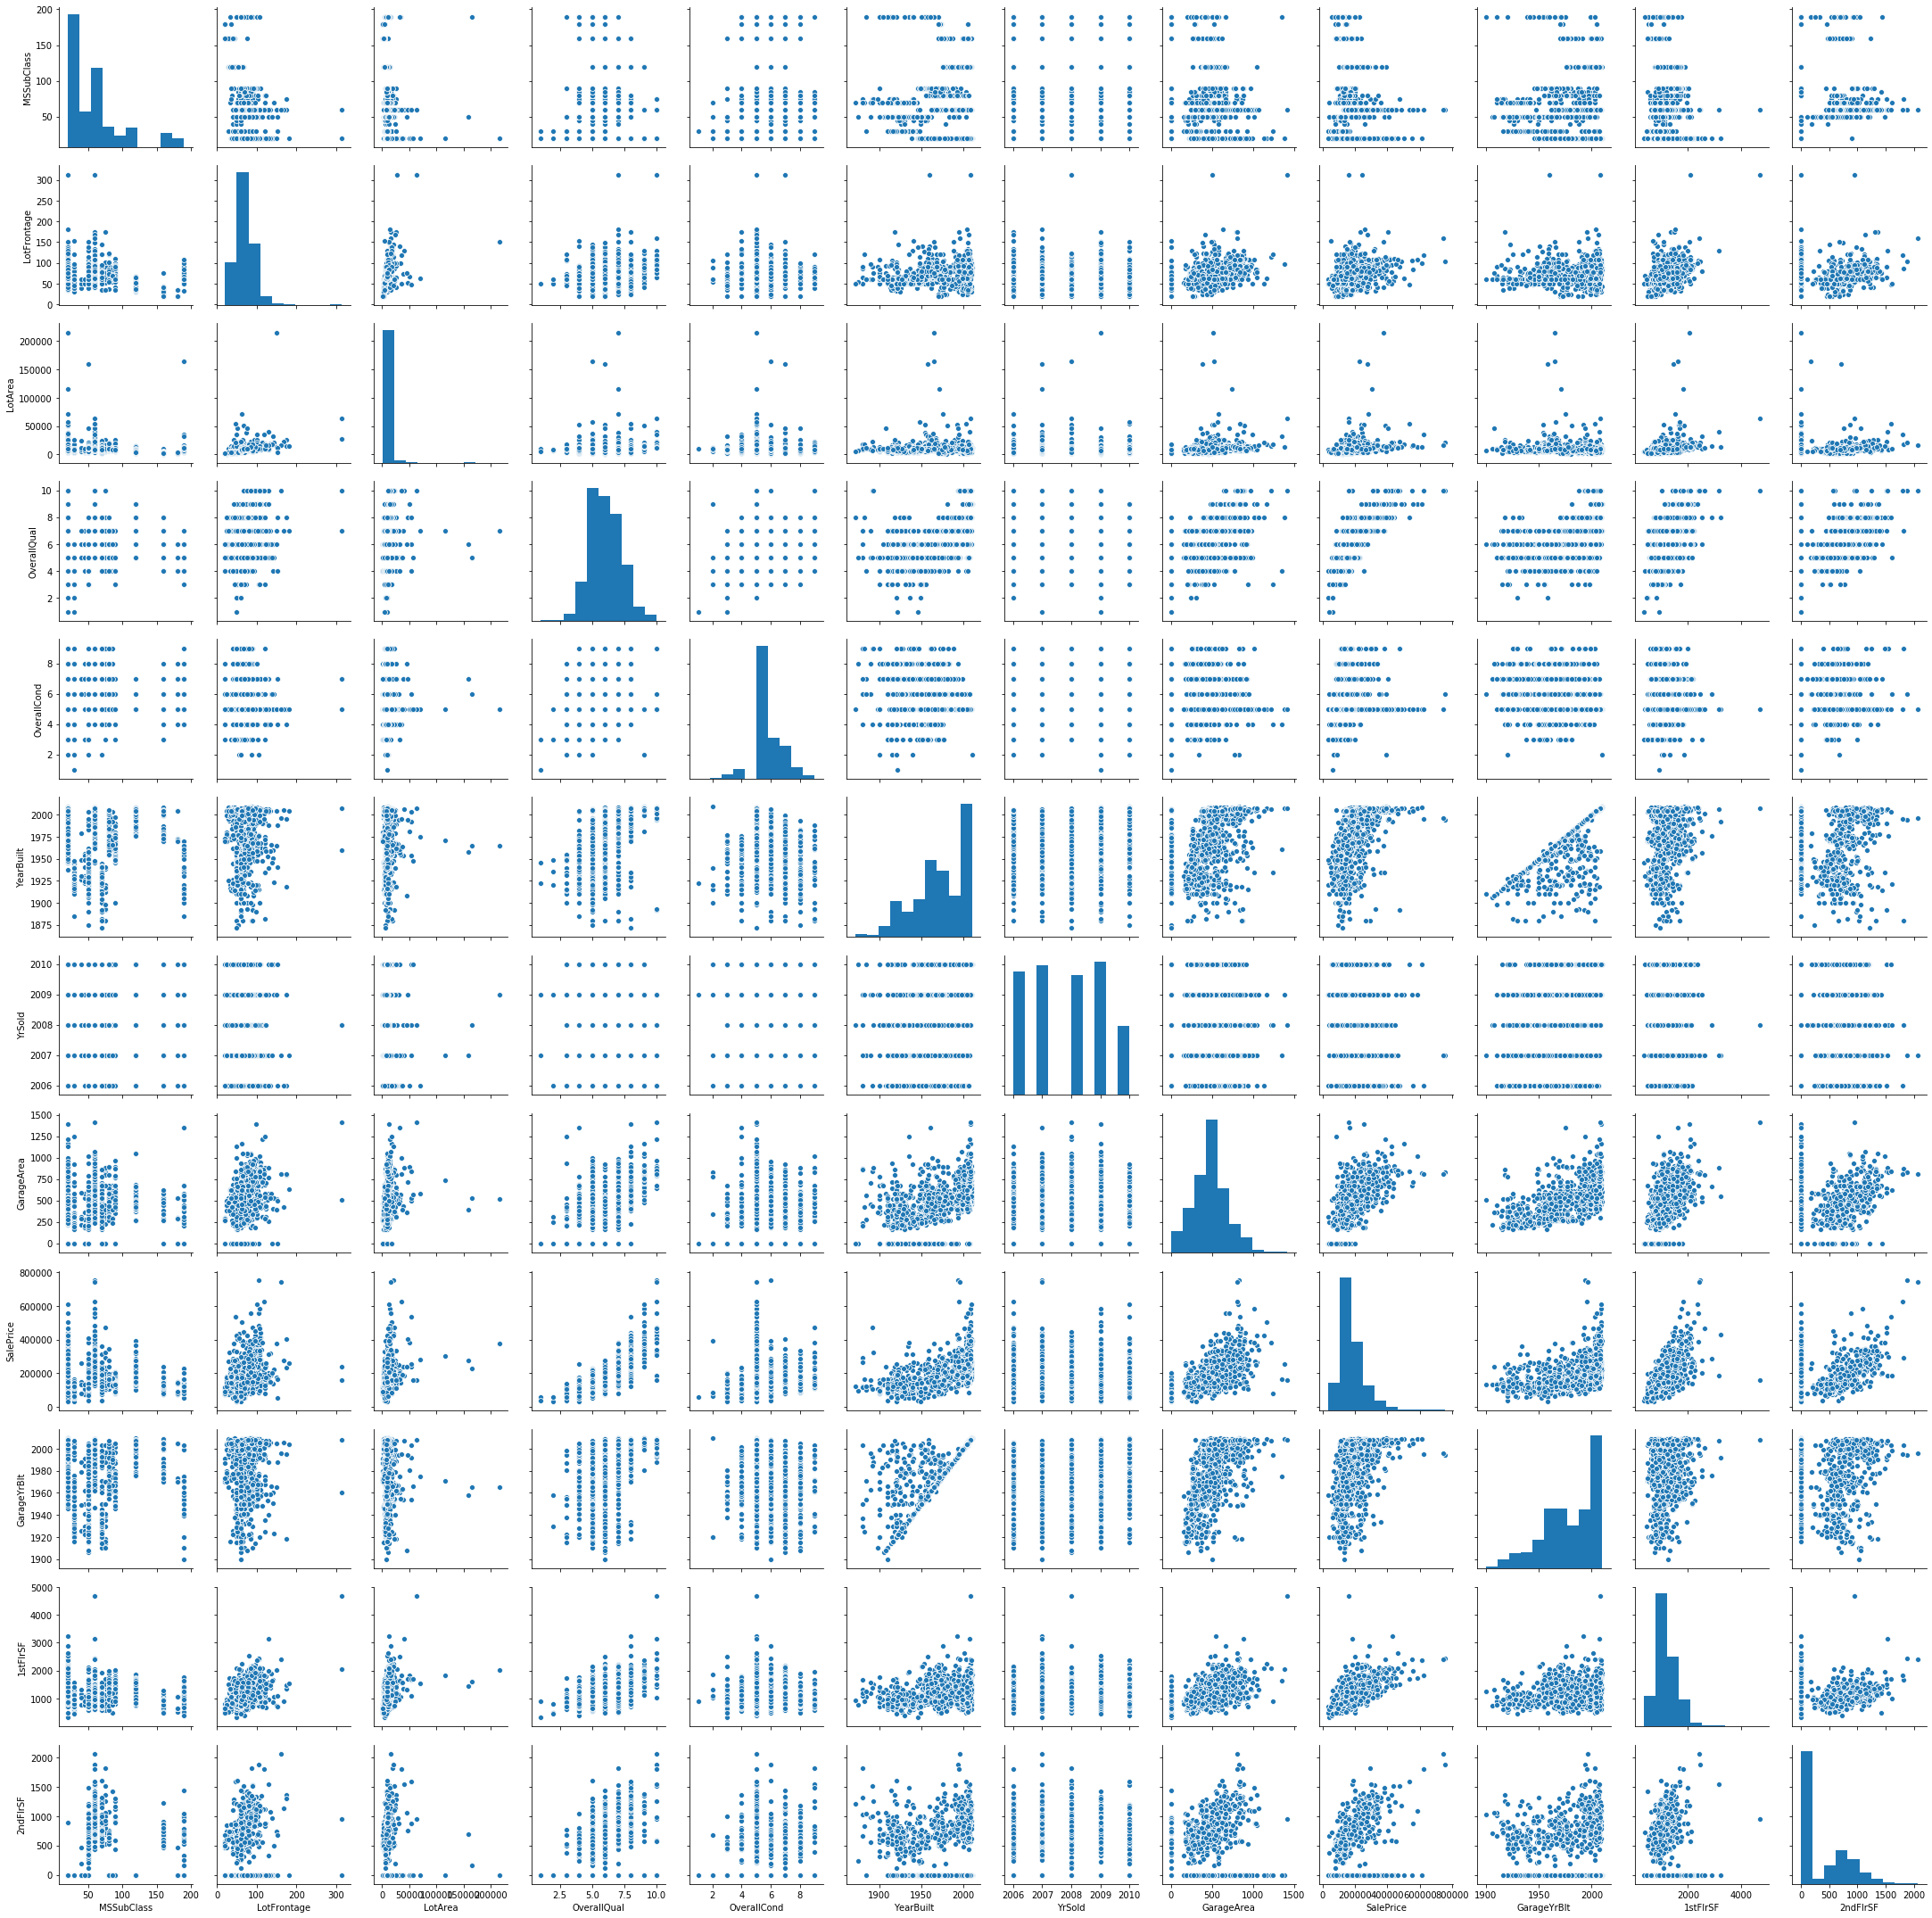

In [13]:
sns.pairplot(house_sub, vars = intplot);
plt.show()

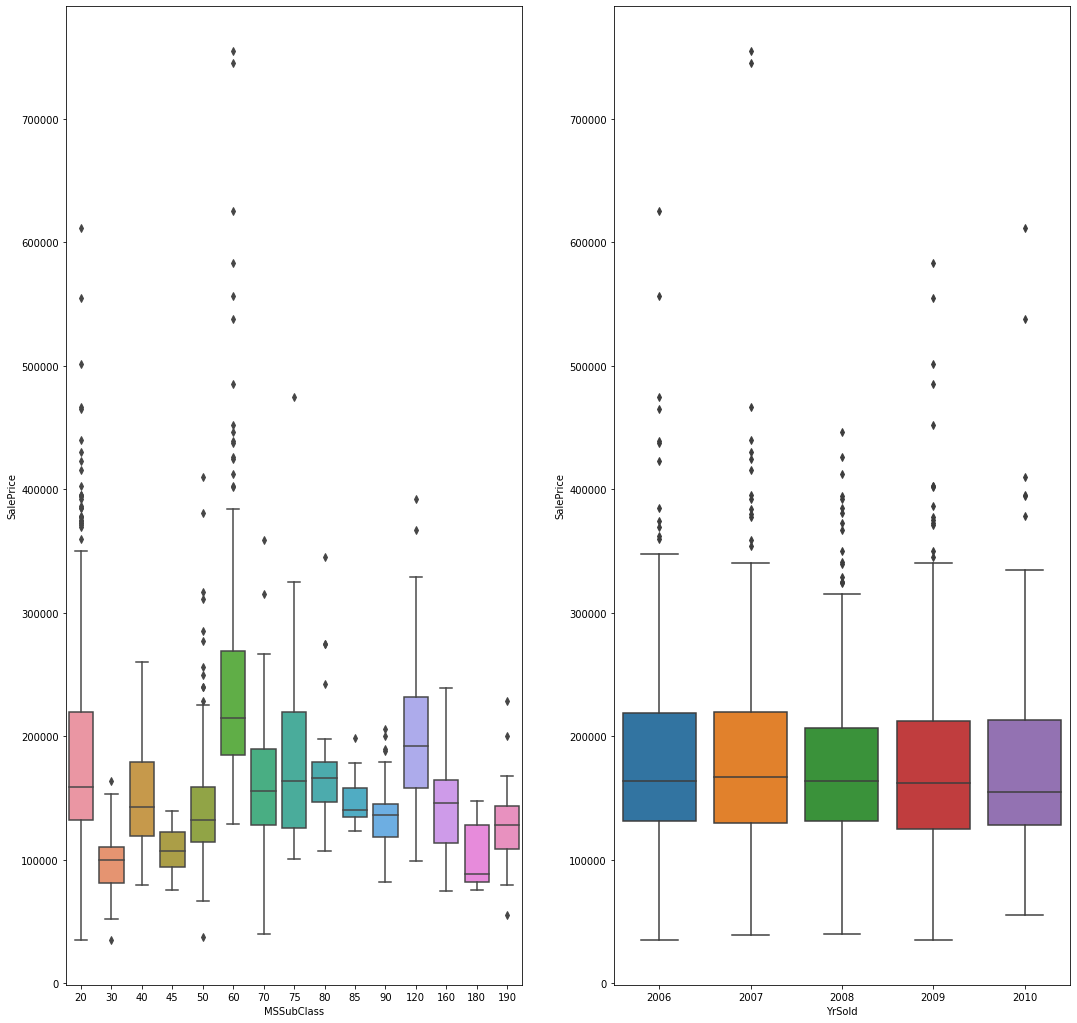

In [14]:
plt.figure(figsize = (18,18))

plt.subplot(121)
sns.boxplot(data = house_sub, y = 'SalePrice' , x = 'MSSubClass')

plt.subplot(122)
sns.boxplot(data = house_sub, y = 'SalePrice', x = 'YrSold',)

plt.show()

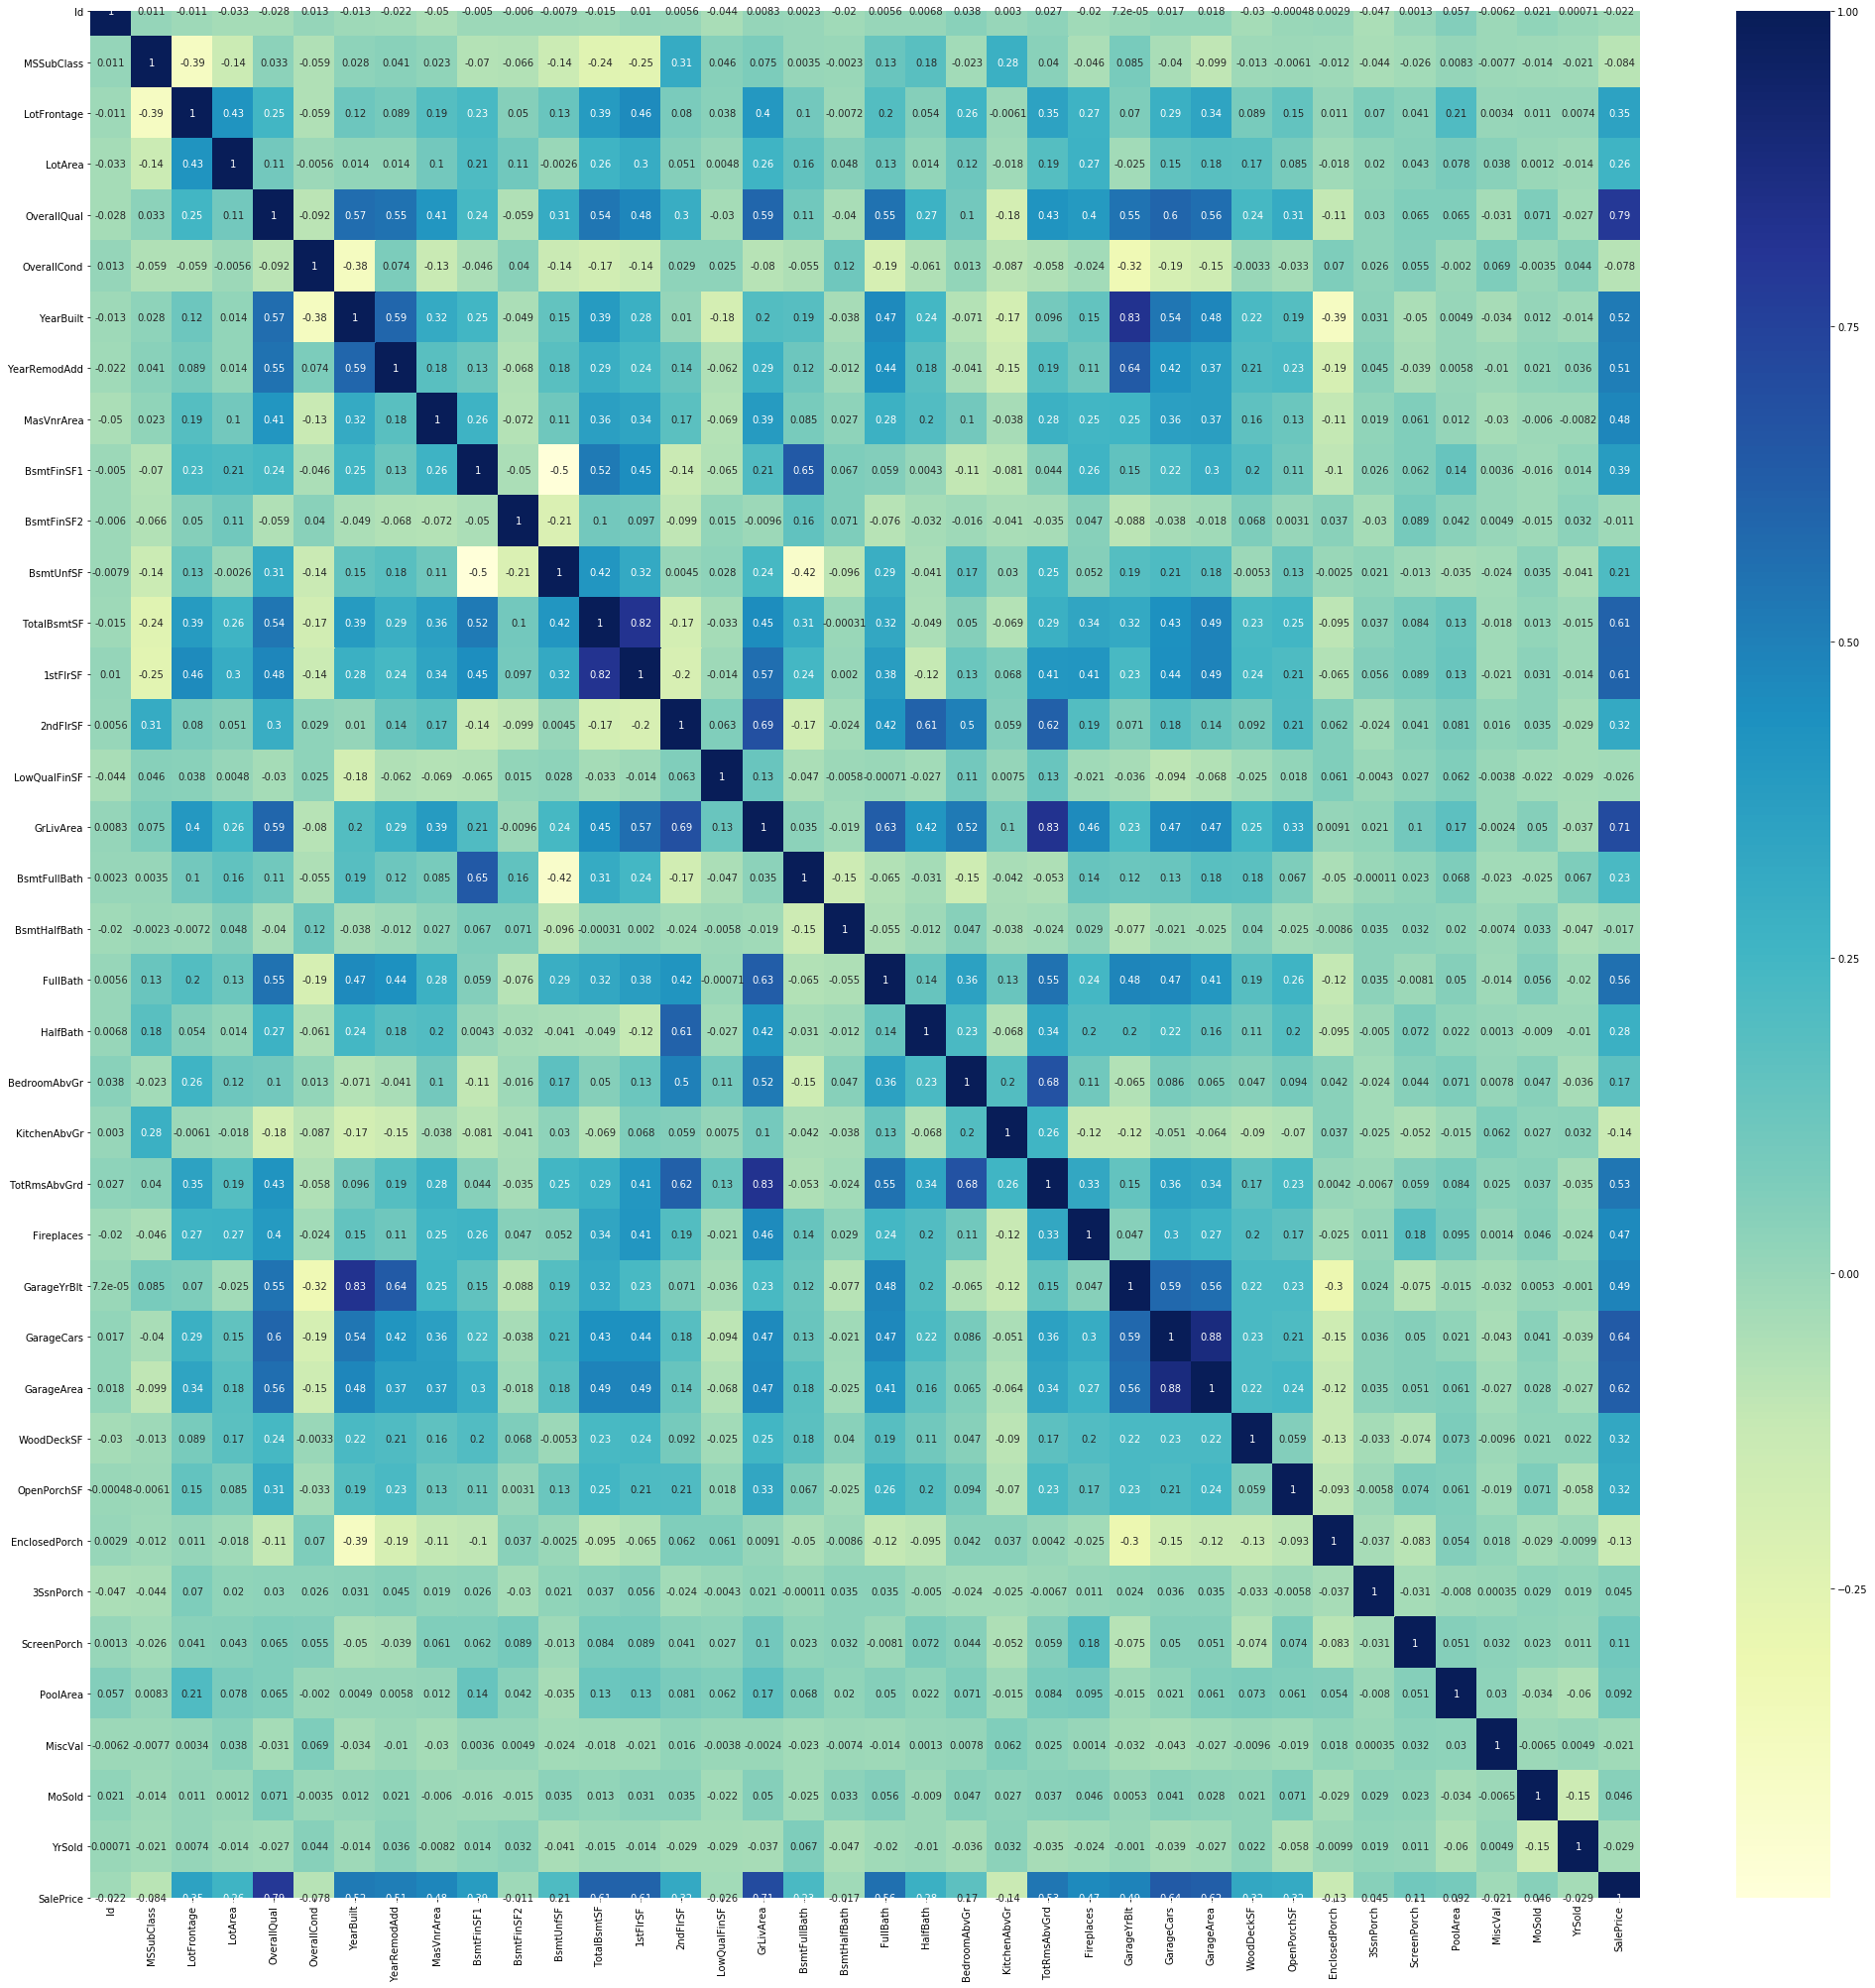

In [15]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(35,35))           
sns.heatmap(house.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

We can see that 'sale price' is highly correlated with:
1. Living area,Overall Quality of the house, 1st floor living area, Second floor living Area,GarageArea.
2. Houses sold in 2006,2007 have fetched good price. Those years could be booming time for real estate industry and people were willing to invest more on real estate.
3. Sub class of 60	have also fetched good price. 
4. There is high correlation between multiple variables as shown in the heat map.

## 3. Data Cleaning

In [16]:
def missing_func(house):
    missing_cols = []
    missing = zip(house.columns,round(100*house.isnull().sum()/len(house.index),2))
    missing = sorted(missing,key = lambda x: x[1])
    for i in missing:
        if i[1] > 0:
            print(i)
            missing_cols.append(i[0])
    #print(missing_cols)
    
    if not missing_cols:
        print('No missing Value found')


In [17]:
# Displaying object type attributes.
objplotfunc(house)

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
Grvl    0.549451
Pave    0.450549
Name: Alley, dtype: float64
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [18]:
# Mapping with meaningful names for the values in multiple coulmns

house['Alley'] = house['Alley'].map({'NA': 'No alley access','Grvl':'Gravel', 'Pave': 'Paved'})
      
house['BsmtQual'] = house['BsmtQual'].map({'NA': 'No Basement','Ex':'Excellent(100+ inches)',
       'Gd':'Good (90-99 inches)',
       'TA':'Typical (80-89 inches)',
       'Fa':'Fair (70-79 inches)',
       'Po':'Poor (<70 inches',})

house['BsmtCond'] = house['BsmtCond'].map({'NA': 'No Basement','Ex':'Excellent',
       'Gd':'Good','TA':'Typical - slight dampness allowed',
       'Fa':'Fair - dampness or some cracking or settling',
       'Po':'Poor - Severe cracking, settling, or wetness'})


house['BsmtExposure'] = house['BsmtExposure'].map({'NA': 'No Basement','Gd':'Good Exposure',
       'Av':'Average Exposure (split levels or foyers typically score average or above)',
       'Mn':'Minimum Exposure','No':'No Exposure'})

house['BsmtFinType1'] = house['BsmtFinType1'].map({'NA': 'No Basement',
       'GLQ':'Good Living Quarters',
       'ALQ':'Average Living Quarters',
       'BLQ':'Below Average Living Quarters',
       'Rec':'Average Rec Room',
       'LwQ':'Low Quality',
       'Unf':'Unfinshed'})

house['BsmtFinType2'] = house['BsmtFinType2'].map({'NA': 'No Basement',
       'GLQ':'Good Living Quarters',
       'ALQ':'Average Living Quarters',
       'BLQ':'Below Average Living Quarters',
       'Rec':'Average Rec Room',
       'LwQ':'Low Quality',
       'Unf':'Unfinshed'})

house['GarageType'] = house['GarageType'].map({'2Types':'More than one type of garage',
       'Attchd':'Attached to home',
       'Basment':'Basement Garage',
       'BuiltIn':'Built-In (Garage part of house - typically has room above garage)',
       'CarPort':'Car Port',
       'Detchd':'Detached from home','NA': 'No Garage'})


house['FireplaceQu'] = house['FireplaceQu'].map({'Ex':'Excellent - Exceptional Masonry Fireplace',
       'Gd':'Good - Masonry Fireplace in main level',
       'TA':'Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement',
       'Fa':'Fair - Prefabricated Fireplace in basement',
       'Po':'Poor - Ben Franklin Stove','NA': 'No Fireplace'})


house['GarageQual'] = house['GarageQual'].map({'Ex':'Excellent',
       'Gd':'Good',
       'TA':'Typical/Average',
       'Fa':'Fair',
       'Po':'Poor',
       'NA':'No Garage'})

 
house['GarageFinish'] = house['GarageFinish'].map({'Fin':'Finished',
       'RFn':'Rough Finished',
       'Unf':'Unfinished',
       'NA':'No Garage'})

house['GarageCond'] = house['GarageCond'].map({'Ex':'Excellent',
       'Gd':'Good',
       'TA':'Typical/Average',
       'Fa':'Fair',
       'Po':'Poor',
       'NA':'No Garage'})

house['PoolQC'] = house['PoolQC'].map({'Ex':'Excellent','Gd':'Good',
       'TA':'Typical/Average',
       'Fa':'Fair',
       'NA':'No Pool'})

house['Fence'] = house['Fence'].map({'GdPrv':'Good Privacy',
       'MnPrv':'Minimum Privacy',
       'GdWo':'Good Wood',
       'MnWw':'Minimum Wood/Wire',
       'NA':'No Fence'})


house['MiscFeature'] = house['MiscFeature'].map({'Elev':'Elevator',
       'Gar2':'2nd Garage (if not described in garage section)',                                          
       'Othr':'Other','Shed':'Shed (over 100 SF)',
       'TenC':'Tennis Court','NA': 'None'})


In [19]:
# Converting the categorical column represented as integer to Category

house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')
for col in ['OverallQual','OverallCond','GarageCars','MSSubClass']:
    print(house[col].value_counts(normalize = True))

5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64
5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64
2    0.564384
1    0.252740
3    0.123973
0    0.055479
4    0.003425
Name: GarageCars, dtype: float64
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64


In [20]:
# Binning to reduce the skewness

house['GarageCars'] = house['GarageCars'].apply(lambda x: 'Others_GarageCars' if x in (3,0,4) else x )
house['OverallCond'] = house['OverallCond'].apply(lambda x: 'Other_Cond' if x in (8,4,3,9,2,1) else x )
house['OverallQual'] = house['OverallQual'].apply(lambda x: 'Other_Qual' if x in (10,4,3,9,2,1) else x )
house['MSSubClass'] = house['MSSubClass'].apply(lambda x: 'Other_Sub_class' if x in (120,30,160,70,80,90,190,85,75,45,180,40) else x )

In [21]:
# Binning to reduce the skewness

house['MSZoning'] = house['MSZoning'].apply(lambda x: 'Others' if x in ('FV','RH','C (all)','RM') else x )
house['LotShape'] = house['LotShape'].apply(lambda x: 'IR1_IR2_IR3' if x in ('IR1','IR2','IR3') else x)
house['LotConfig'] = house['LotConfig'].apply(lambda x: 'Others' if x in ('CulDSac','FR2','FR3') else x)


house['Neighborhood'] = house['Neighborhood'].apply(lambda x: 'Others' if x in ('Edwards','Somerst','Gilbert','NridgHt','Sawyer','NWAmes','BrkSide',
                                          'Crawfor','Mitchel', 'NoRidge', 'Timber', 'IDOTRR','ClearCr','SWISU',
                                          'SawyerW','StoneBr','MeadowV','Blmngtn','BrDale','Veenker','NPkVill','Blueste') else x)
house['HouseStyle'] = house['HouseStyle'].apply(lambda x: 'Others' if x in ('SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin') else x )

house['RoofStyle'] = house['RoofStyle'].apply(lambda x: 'Other_Roofstyles' if x in ('Hip','Flat','Gambrel','Mansard','Shed') else x)
house['Exterior1st'] = house['Exterior1st'].apply(lambda x: 'Others' if x in ('CemntBd','BrkFace','WdShing',
                                                'ImStucc','Stucco','AsbShng','Stone','BrkComm','CBlock','AsphShn') else x )
house['Exterior2nd'] = house['Exterior2nd'].apply(lambda x: 'Others' if x in ('CmentBd','BrkFace','Wd Shng','Other',
                                                'ImStucc','Stucco','AsbShng','Stone','Brk Cmn','CBlock','AsphShn') else x )


house['MasVnrType'] = house['MasVnrType'].apply(lambda x: 'Stone_BrkCmn' if x in ('Stone','BrkCmn') else x)
house['ExterQual'] = house['ExterQual'].apply(lambda x: 'Gd_Ex_Fa' if x in ('Gd','Ex','Fa') else x)
house['Foundation'] = house['Foundation'].apply(lambda x: 'Other_Foundation' if x in ('BrkTil','Slab','Stone','Wood') else x)
house['BsmtQual'] = house['BsmtQual'].apply(lambda x: 'Excellent_Fair' if x in ('Excellent(100+ inches)','Fair (70-79 inches)') else x)
house['BsmtExposure'] = house['BsmtExposure'].apply(lambda x: 'Good_Minimum' if x in ('Good Exposure','Minimum Exposure') else x)

house['BsmtFinType1'] = house['BsmtFinType1'].apply(lambda x: 'OthersFin' if x in ('Average Rec Room','Low Quality') else x)
house['HeatingQC'] = house['HeatingQC'].apply(lambda x: 'OtherHeatingQC' if x in ('Gd','Fa','Po') else x)
house['KitchenQual'] = house['KitchenQual'].apply(lambda x: 'Ex_Fa' if x in ('Ex','Fa') else x)

house['FireplaceQu'] = house['FireplaceQu'].apply(lambda x: 'Fa_Ex_Po' if x in ('Fair - Prefabricated Fireplace in basement',
                                                     'Excellent - Exceptional Masonry Fireplace','Poor - Ben Franklin Stove') else x)
house['GarageType'] = house['GarageType'].apply(lambda x: 'Other_Garage' if x in ('Built-In (Garage part of house - typically has room above garage)',
                          'Basement Garage','Car Port','More than one type of garage') else x)
house['Fence'] = house['Fence'].apply(lambda x: 'Gd_Mn' if x in ('Good Wood','Minimum Wood/Wire') else x)



In [22]:
objplotfunc(house)

20                 0.367123
Other_Sub_class    0.329452
60                 0.204795
50                 0.098630
Name: MSSubClass, dtype: float64
RL        0.788356
Others    0.211644
Name: MSZoning, dtype: float64
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
Gravel    0.549451
Paved     0.450549
Name: Alley, dtype: float64
Reg            0.633562
IR1_IR2_IR3    0.366438
Name: LotShape, dtype: float64
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
Inside    0.720548
Corner    0.180137
Others    0.099315
Name: LotConfig, dtype: float64
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
Others     0.665753
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Name: Neighborhood, dtype: float64
Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.00

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [23]:
# Dropping highly skewed columns

house.drop(['Street','Utilities','LandContour','LandSlope','Condition1', 'Condition2', 'BldgType', 'RoofMatl',
            'ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir', 'Electrical',
           'Functional','GarageQual','GarageCond','PavedDrive','MiscFeature','SaleType',
           'SaleCondition'], axis = 1, inplace = True)

In [24]:
# Displaying columns having nulls along with their Null value percentage

missing_func(house)

('MasVnrType', 0.55)
('MasVnrArea', 0.55)
('BsmtQual', 2.53)
('BsmtFinType1', 2.53)
('BsmtExposure', 2.6)
('GarageType', 5.55)
('GarageYrBlt', 5.55)
('GarageFinish', 5.55)
('LotFrontage', 17.74)
('FireplaceQu', 47.26)
('Fence', 80.75)
('Alley', 93.77)
('PoolQC', 99.52)


In [25]:
# Dropping columns with missing value percentage of more than 80

house.drop(['Fence','PoolQC','Alley'], axis = 1, inplace = True)

In [26]:
# Imputing the rest of column null values with a relevant central tendency. This is done using the info obtained with EDA.\
# For others imputing with meaniful missing such as GarageType is null because No Garage

house['MasVnrType'] = house['MasVnrType'].fillna('None')
house['MasVnrArea'] = house['MasVnrArea'].fillna(0)
house['BsmtQual'] = house['BsmtQual'].fillna('No Basement')
house['BsmtFinType1'] = house['BsmtFinType1'].fillna('No Basement')
house['BsmtExposure'] = house['BsmtExposure'].fillna('No Basement')
house['GarageType'] = house['GarageType'].fillna('No Garage')
house['GarageFinish'] = house['GarageFinish'].fillna('No Garage')
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(-1)
house['LotFrontage'] = house['LotFrontage'].fillna(house['LotFrontage'].median())
house['FireplaceQu'] = house['FireplaceQu'].fillna('No Fireplace')

In [27]:
# After missing value treatment no missing values left

missing_func(house)

No missing Value found


In [28]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

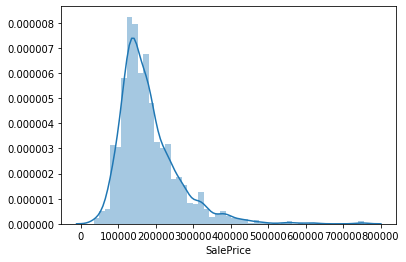

In [29]:
# SalePrice column is not normally distributed. 

sns.distplot(house['SalePrice']);

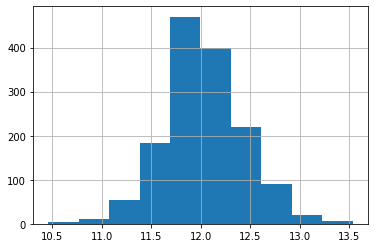

In [30]:
# Log transformation applied to make SalePrice column distribution normal.

house['SalePrice'] = np.log(house['SalePrice'])
house['SalePrice'].hist();

In [31]:
# Now after cleaning steps, house df is left with 57 columns

house.shape

(1460, 57)

In [32]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
LotShape         1460 non-null object
LotConfig        1460 non-null object
Neighborhood     1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinType1     1460 non-null object
BsmtFinSF1       1460

## 4. Data Preparation 

In [33]:
# Select Object datatype columns for creating dummies

house_categorical = house.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageCars
0,60,RL,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd_Ex_Fa,PConc,Good (90-99 inches),No Exposure,Good Living Quarters,Ex,Gd,No Fireplace,Attached to home,Rough Finished,2
1,20,RL,Reg,Others,Others,1Story,6,Other_Cond,Gable,MetalSd,MetalSd,None,TA,CBlock,Good (90-99 inches),Good_Minimum,Average Living Quarters,Ex,TA,Average - Prefabricated Fireplace in main livi...,Attached to home,Rough Finished,2
2,60,RL,IR1_IR2_IR3,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd_Ex_Fa,PConc,Good (90-99 inches),Good_Minimum,Good Living Quarters,Ex,Gd,Average - Prefabricated Fireplace in main livi...,Attached to home,Rough Finished,2
3,Other_Sub_class,RL,IR1_IR2_IR3,Corner,Others,2Story,7,5,Gable,Wd Sdng,Others,None,TA,Other_Foundation,Typical (80-89 inches),No Exposure,Average Living Quarters,OtherHeatingQC,Gd,Good - Masonry Fireplace in main level,Detached from home,Unfinished,Others_GarageCars
4,60,RL,IR1_IR2_IR3,Others,Others,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd_Ex_Fa,PConc,Good (90-99 inches),Average Exposure (split levels or foyers typic...,Good Living Quarters,Ex,Gd,Average - Prefabricated Fireplace in main livi...,Attached to home,Rough Finished,Others_GarageCars


In [34]:
# There are 23 object data type columns
house_categorical.shape

(1460, 23)

In [35]:
# Creating dummies for object data type columns, dropping one column of the lot. 56 columns are obtained post creating dummies

house_dummies = pd.get_dummies(house_categorical, drop_first = True)

print(house_dummies.shape)

house_dummies.head()

(1460, 62)


,MSSubClass_50,MSSubClass_60,MSSubClass_Other_Sub_class,MSZoning_RL,LotShape_Reg,LotConfig_Inside,LotConfig_Others,Neighborhood_NAmes,Neighborhood_OldTown,Neighborhood_Others,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other_Qual,OverallCond_6,OverallCond_7,OverallCond_Other_Cond,RoofStyle_Other_Roofstyles,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Stone_BrkCmn,ExterQual_TA,Foundation_Other_Foundation,Foundation_PConc,BsmtQual_Good (90-99 inches),BsmtQual_No Basement,BsmtQual_Typical (80-89 inches),BsmtExposure_Good_Minimum,BsmtExposure_No Basement,BsmtExposure_No Exposure,BsmtFinType1_Below Average Living Quarters,BsmtFinType1_Good Living Quarters,BsmtFinType1_No Basement,BsmtFinType1_OthersFin,BsmtFinType1_Unfinshed,HeatingQC_OtherHeatingQC,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa_Ex_Po,FireplaceQu_Good - Masonry Fireplace in main level,FireplaceQu_No Fireplace,GarageType_Detached from home,GarageType_No Garage,GarageType_Other_Garage,GarageFinish_No Garage,GarageFinish_Rough Finished,GarageFinish_Unfinished,GarageCars_2,GarageCars_Others_GarageCars
0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1
4,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [36]:
# drop categorical variables from main df house

house = house.drop(list(house_categorical.columns), axis=1)
house.shape

(1460, 34)

In [37]:
# concat dummy variables created df with house. 96 columns are left all together.

house = pd.concat([house, house_dummies], axis=1)
house.shape

(1460, 96)

In [38]:
house.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_50,MSSubClass_60,MSSubClass_Other_Sub_class,MSZoning_RL,LotShape_Reg,LotConfig_Inside,LotConfig_Others,Neighborhood_NAmes,Neighborhood_OldTown,Neighborhood_Others,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other_Qual,OverallCond_6,OverallCond_7,OverallCond_Other_Cond,RoofStyle_Other_Roofstyles,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Stone_BrkCmn,ExterQual_TA,Foundation_Other_Foundation,Foundation_PConc,BsmtQual_Good (90-99 inches),BsmtQual_No Basement,BsmtQual_Typical (80-89 inches),BsmtExposure_Good_Minimum,BsmtExposure_No Basement,BsmtExposure_No Exposure,BsmtFinType1_Below Average Living Quarters,BsmtFinType1_Good Living Quarters,BsmtFinType1_No Basement,BsmtFinType1_OthersFin,BsmtFinType1_Unfinshed,HeatingQC_OtherHeatingQC,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa_Ex_Po,FireplaceQu_Good - Masonry Fireplace in main level,FireplaceQu_No Fireplace,GarageType_Detached from home,GarageType_No Garage,GarageType_Other_Garage,GarageFinish_No Garage,GarageFinish_Rough Finished,GarageFinish_Unfinished,GarageCars_2,GarageCars_Others_GarageCars
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,548,0,61,0,0,0,0,0,2,2008,12.247694,0,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,460,298,0,0,0,0,0,0,5,2007,12.109011,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,608,0,42,0,0,0,0,0,9,2008,12.317167,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,642,0,35,272,0,0,0,0,2,2006,11.849398,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,836,192,84,0,0,0,0,0,12,2008,12.429216,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [39]:
# Feature Engineering and obtain new year age columns for easier interpretation and more information gain

house['Building_Age'] = house['YearBuilt'].apply(lambda x: int(2020) - x)
house['Sold'] = house['YrSold'].apply(lambda x: int(2020) - x)
house['Garage Age'] = house['GarageYrBlt'].apply(lambda x: int(2020) - x)
house['Year_Renovated'] = house['YearRemodAdd'].apply(lambda x: int(2020) - x)


In [40]:
# Dropping the original columns as we already have the derived columns

house.drop(['YrSold','YearBuilt','GarageYrBlt','YearRemodAdd'], axis = 1, inplace = True)
house.shape

(1460, 96)

## 5. Model Building

In [41]:
# Splitting: Train data is 70% of the original size of house df and test data is 30% of the original size. 

np.random.seed(0)
df_train,df_test = train_test_split(house, train_size = 0.7,random_state = 100)
print(house.shape)
print(df_train.shape)
print(df_test.shape)


(1460, 96)
(1021, 96)
(439, 96)


In [42]:
# Obtaining numeric columns for scaling

int_plot = []
for col in house.columns:
    if (house[col].dtype == 'float64') | (house[col].dtype == 'int64') :
        int_plot.append(col)
print(int_plot)

['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'Building_Age', 'Sold', 'Garage Age', 'Year_Renovated']


In [43]:
scale = MinMaxScaler()

#Numerical Variables for scaling

var = ['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 
       'Building_Age', 'Sold', 'Garage Age', 'Year_Renovated']
df_train[var] = scale.fit_transform(df_train[var])

print(df_train.shape)
df_train.head()


(1021, 96)


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,MSSubClass_50,MSSubClass_60,MSSubClass_Other_Sub_class,MSZoning_RL,LotShape_Reg,LotConfig_Inside,LotConfig_Others,Neighborhood_NAmes,Neighborhood_OldTown,Neighborhood_Others,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other_Qual,OverallCond_6,OverallCond_7,OverallCond_Other_Cond,RoofStyle_Other_Roofstyles,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Stone_BrkCmn,ExterQual_TA,Foundation_Other_Foundation,Foundation_PConc,BsmtQual_Good (90-99 inches),BsmtQual_No Basement,BsmtQual_Typical (80-89 inches),BsmtExposure_Good_Minimum,BsmtExposure_No Basement,BsmtExposure_No Exposure,BsmtFinType1_Below Average Living Quarters,BsmtFinType1_Good Living Quarters,BsmtFinType1_No Basement,BsmtFinType1_OthersFin,BsmtFinType1_Unfinshed,HeatingQC_OtherHeatingQC,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa_Ex_Po,FireplaceQu_Good - Masonry Fireplace in main level,FireplaceQu_No Fireplace,GarageType_Detached from home,GarageType_No Garage,GarageType_Other_Garage,GarageFinish_No Garage,GarageFinish_Rough Finished,GarageFinish_Unfinished,GarageCars_2,GarageCars_Others_GarageCars,Building_Age,Sold,Garage Age,Year_Renovated
318,0.217958,0.236301,0.039403,0.16,0.174876,0.000000,0.154110,0.220458,0.231481,0.616949,0.0,0.424289,0.333333,0.0,0.666667,0.5,0.500,0.0,0.545455,0.333333,0.462623,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.0,0.272727,12.468437,0,1,0,1,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.123188,0.25,0.008454,0.283333
239,0.163811,0.106164,0.033981,0.00,0.016655,0.000000,0.274401,0.120295,0.098611,0.333656,0.0,0.201576,0.000000,0.0,0.333333,0.5,0.375,0.0,0.363636,0.333333,0.155148,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.0,0.272727,11.635143,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0.471014,0.00,0.030333,1.000000
986,0.675805,0.130137,0.017931,0.00,0.000000,0.000000,0.207620,0.079378,0.145602,0.307022,0.0,0.230015,0.000000,0.0,0.333333,0.0,0.250,0.0,0.181818,0.000000,0.179831,0.459743,0.000000,0.000000,0.0,0.0,0.0,0.0,0.454545,11.669929,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0.724638,1.00,0.029836,0.116667
1416,0.970528,0.133562,0.046139,0.00,0.000000,0.000000,0.332620,0.127169,0.202315,0.505569,0.0,0.355880,0.000000,0.0,0.666667,0.0,0.500,0.5,0.727273,0.000000,0.394922,0.000000,0.000000,0.206522,0.0,0.0,0.0,0.0,0.272727,11.715866,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0.905797,0.00,0.019393,1.000000
390,0.267306,0.099315,0.032409,0.00,0.042700,0.265265,0.098031,0.140917,0.136343,0.196610,0.0,0.178517,0.333333,0.0,0.333333,0.0,0.500,0.0,0.363636,0.000000,0.270804,0.000000,0.248566,0.202899,0.0,0.0,0.0,0.0,0.272727,11.686879,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0.797101,0.50,0.015912,1.000000


In [44]:
# Target Variable here is SalePrice and the rest are Predictor variables
X_train = df_train
y_train = df_train.pop('SalePrice')


In [45]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()

rfe = RFE(lm,50)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False False False  True  True  True False  True
  True  True  True  True  True  True  True  True False  True False  True
  True  True  True False False  True  True  True  True False False False
 False  True False False False False False  True  True False  True  True
 False False  True False False False False  True False False False False
 False  True False False False  True  True  True  True False False False
  True  True False False False False  True  True  True  True False  True
  True  True  True False False  True  True  True False False  True]
[29  1  1  1  7 17 15  1  1  1 30  1  1  1  1  1  1  1  1  1  5  1 43  1
  1  1  1 12 38  1  1  1  1 40 44 16 20  1 25 45 42  2 27  1  1 13  1  1
 46 28  1 22 35 33 34  1  9 37 32 31 39  1  4 24 14  1  1  1  1 21 26 23
  1  1 10  8 41  6  1  1  1  1 19  1  1  1  1 36 11  1  1  1 18  3  1]


In [46]:
# Displaying Ranking of all the columns

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Id', False, 29),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', False, 7),
 ('BsmtFinSF2', False, 17),
 ('BsmtUnfSF', False, 15),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 30),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageArea', False, 5),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 43),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 12),
 ('MoSold', False, 38),
 ('MSSubClass_50', True, 1),
 ('MSSubClass_60', True, 1),
 ('MSSubClass_Other_Sub_class', True, 1),
 ('MSZoning_RL', True, 1),
 ('LotShape_Reg', False, 40),
 ('LotConfig_Inside', False, 44),
 ('LotConfig_Others', False, 16),
 ('Neighborhood_N

In [47]:
# Retained columns

col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MSSubClass_50', 'MSSubClass_60',
       'MSSubClass_Other_Sub_class', 'MSZoning_RL', 'Neighborhood_OldTown',
       'OverallQual_7', 'OverallQual_8', 'OverallCond_6', 'OverallCond_7',
       'Exterior1st_MetalSd', 'Exterior2nd_MetalSd', 'MasVnrType_Stone_BrkCmn',
       'BsmtQual_Good (90-99 inches)', 'BsmtQual_No Basement',
       'BsmtQual_Typical (80-89 inches)', 'BsmtExposure_Good_Minimum',
       'BsmtFinType1_Good Living Quarters', 'BsmtFinType1_No Basement',
       'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Fa_Ex_Po',
       'FireplaceQu_Good - Masonry Fireplace in main level',
       'GarageType_Detached from home', 'GarageType_No Garage',
       'GarageType_Ot

In [48]:
# Unimportant as per RFE

X_train.columns[~rfe.support_]

Index(['Id', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       'GarageArea', 'OpenPorchSF', 'MiscVal', 'MoSold', 'LotShape_Reg',
       'LotConfig_Inside', 'LotConfig_Others', 'Neighborhood_NAmes',
       'Neighborhood_Others', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'HouseStyle_Others', 'OverallQual_6', 'OverallQual_Other_Qual',
       'OverallCond_Other_Cond', 'RoofStyle_Other_Roofstyles',
       'Exterior1st_Others', 'Exterior1st_Plywood', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_Others', 'Exterior2nd_Plywood',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_None',
       'ExterQual_TA', 'Foundation_Other_Foundation', 'Foundation_PConc',
       'BsmtExposure_No Basement', 'BsmtExposure_No Exposure',
       'BsmtFinType1_Below Average Living Quarters', 'BsmtFinType1_OthersFin',
       'BsmtFinType1_Unfinshed', 'HeatingQC_OtherHeatingQC', 'HeatingQC_TA',
       'FireplaceQu_No Fireplace', 'GarageFinish_Rough Finished',
 

In [49]:
# Creating a df with Saleprice

house_sale = pd.DataFrame(house['SalePrice'])
house_sale.head()

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


In [50]:
# Creating a df with columns chosen by RFE

house_rfe = pd.DataFrame(house[col])
house_rfe.head(2)

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSSubClass_50,MSSubClass_60,MSSubClass_Other_Sub_class,MSZoning_RL,Neighborhood_OldTown,OverallQual_7,OverallQual_8,OverallCond_6,OverallCond_7,Exterior1st_MetalSd,Exterior2nd_MetalSd,MasVnrType_Stone_BrkCmn,BsmtQual_Good (90-99 inches),BsmtQual_No Basement,BsmtQual_Typical (80-89 inches),BsmtExposure_Good_Minimum,BsmtFinType1_Good Living Quarters,BsmtFinType1_No Basement,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa_Ex_Po,FireplaceQu_Good - Masonry Fireplace in main level,GarageType_Detached from home,GarageType_No Garage,GarageType_Other_Garage,GarageFinish_No Garage,GarageCars_2,GarageCars_Others_GarageCars,Building_Age,Year_Renovated
0,65.0,8450,196.0,856,856,854,1710,1,0,2,1,3,1,8,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,17,17
1,80.0,9600,0.0,1262,1262,0,1262,0,1,2,0,3,1,6,1,298,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,44,44


In [51]:
# Concatenating 2 df's prepared

house = pd.concat([house_sale,house_rfe], axis = 1)
house.head(2)

,SalePrice,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSSubClass_50,MSSubClass_60,MSSubClass_Other_Sub_class,MSZoning_RL,Neighborhood_OldTown,OverallQual_7,OverallQual_8,OverallCond_6,OverallCond_7,Exterior1st_MetalSd,Exterior2nd_MetalSd,MasVnrType_Stone_BrkCmn,BsmtQual_Good (90-99 inches),BsmtQual_No Basement,BsmtQual_Typical (80-89 inches),BsmtExposure_Good_Minimum,BsmtFinType1_Good Living Quarters,BsmtFinType1_No Basement,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa_Ex_Po,FireplaceQu_Good - Masonry Fireplace in main level,GarageType_Detached from home,GarageType_No Garage,GarageType_Other_Garage,GarageFinish_No Garage,GarageCars_2,GarageCars_Others_GarageCars,Building_Age,Year_Renovated
0,12.247694,65.0,8450,196.0,856,856,854,1710,1,0,2,1,3,1,8,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,17,17
1,12.109011,80.0,9600,0.0,1262,1262,0,1262,0,1,2,0,3,1,6,1,298,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,44,44


In [52]:
# Splitting: Train data is 70% of the original size of house df and test data is 30% of the original size. 

np.random.seed(0)
df_train,df_test = train_test_split(house, train_size = 0.7,random_state = 100)
print(house.shape)
print(df_train.shape)
print(df_test.shape)

(1460, 51)
(1021, 51)
(439, 51)


In [53]:
# Obtaining numeric columns for scaling

int_plot = []
for col in house.columns:
    if (house[col].dtype == 'float64') | (house[col].dtype == 'int64') :
        int_plot.append(col)
print(int_plot)

['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Building_Age', 'Year_Renovated']


In [54]:
scale = MinMaxScaler()

#Numerical Variables for scaling

var = ['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Building_Age', 'Year_Renovated']

df_train[var] = scale.fit_transform(df_train[var])

print(df_train.shape)
df_train.head()


(1021, 51)


,SalePrice,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSSubClass_50,MSSubClass_60,MSSubClass_Other_Sub_class,MSZoning_RL,Neighborhood_OldTown,OverallQual_7,OverallQual_8,OverallCond_6,OverallCond_7,Exterior1st_MetalSd,Exterior2nd_MetalSd,MasVnrType_Stone_BrkCmn,BsmtQual_Good (90-99 inches),BsmtQual_No Basement,BsmtQual_Typical (80-89 inches),BsmtExposure_Good_Minimum,BsmtFinType1_Good Living Quarters,BsmtFinType1_No Basement,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa_Ex_Po,FireplaceQu_Good - Masonry Fireplace in main level,GarageType_Detached from home,GarageType_No Garage,GarageType_Other_Garage,GarageFinish_No Garage,GarageCars_2,GarageCars_Others_GarageCars,Building_Age,Year_Renovated
318,12.468437,0.236301,0.039403,0.16,0.220458,0.231481,0.616949,0.424289,0.333333,0.0,0.666667,0.5,4,0.0,0.545455,0.333333,0.396733,0.260870,0.0,0.0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0.123188,0.283333
239,11.635143,0.106164,0.033981,0.00,0.120295,0.098611,0.333656,0.201576,0.000000,0.0,0.333333,0.5,3,0.0,0.363636,0.333333,0.000000,0.000000,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0.471014,1.000000
986,11.669929,0.130137,0.017931,0.00,0.079378,0.145602,0.307022,0.230015,0.000000,0.0,0.333333,0.0,2,0.0,0.181818,0.000000,0.459743,0.000000,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.724638,0.116667
1416,11.715866,0.133562,0.046139,0.00,0.127169,0.202315,0.505569,0.355880,0.000000,0.0,0.666667,0.0,4,0.5,0.727273,0.000000,0.000000,0.206522,0.0,0.0,0.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0.905797,1.000000
390,11.686879,0.099315,0.032409,0.00,0.140917,0.136343,0.196610,0.178517,0.333333,0.0,0.333333,0.0,4,0.0,0.363636,0.000000,0.000000,0.202899,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0.797101,1.000000


In [55]:
# Target Variable here is SalePrice and the rest are Predictor variables

X_train = df_train
y_train = df_train.pop('SalePrice')

In [56]:
X_train

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSSubClass_50,MSSubClass_60,MSSubClass_Other_Sub_class,MSZoning_RL,Neighborhood_OldTown,OverallQual_7,OverallQual_8,OverallCond_6,OverallCond_7,Exterior1st_MetalSd,Exterior2nd_MetalSd,MasVnrType_Stone_BrkCmn,BsmtQual_Good (90-99 inches),BsmtQual_No Basement,BsmtQual_Typical (80-89 inches),BsmtExposure_Good_Minimum,BsmtFinType1_Good Living Quarters,BsmtFinType1_No Basement,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa_Ex_Po,FireplaceQu_Good - Masonry Fireplace in main level,GarageType_Detached from home,GarageType_No Garage,GarageType_Other_Garage,GarageFinish_No Garage,GarageCars_2,GarageCars_Others_GarageCars,Building_Age,Year_Renovated
318,0.236301,0.039403,0.16000,0.220458,0.231481,0.616949,0.424289,0.333333,0.0,0.666667,0.5,4,0.0,0.545455,0.333333,0.396733,0.260870,0.0,0.0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0.123188,0.283333
239,0.106164,0.033981,0.00000,0.120295,0.098611,0.333656,0.201576,0.000000,0.0,0.333333,0.5,3,0.0,0.363636,0.333333,0.000000,0.000000,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0.471014,1.000000
986,0.130137,0.017931,0.00000,0.079378,0.145602,0.307022,0.230015,0.000000,0.0,0.333333,0.0,2,0.0,0.181818,0.000000,0.459743,0.000000,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.724638,0.116667
1416,0.133562,0.046139,0.00000,0.127169,0.202315,0.505569,0.355880,0.000000,0.0,0.666667,0.0,4,0.5,0.727273,0.000000,0.000000,0.206522,0.0,0.0,0.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0.905797,1.000000
390,0.099315,0.032409,0.00000,0.140917,0.136343,0.196610,0.178517,0.333333,0.0,0.333333,0.0,4,0.0,0.363636,0.000000,0.000000,0.202899,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0.797101,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.143836,0.031445,0.00000,0.119149,0.082407,0.352542,0.195619,0.333333,0.0,0.666667,0.5,3,0.0,0.363636,0.333333,0.042007,0.000000,0.0,0.0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0.036232,0.083333
53,0.160959,0.228257,0.00000,0.301473,0.340278,0.000000,0.269792,0.666667,0.0,0.000000,0.5,0,0.0,0.181818,0.333333,1.000000,0.000000,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0.210145,0.383333
350,0.160959,0.029672,0.22625,0.305892,0.346528,0.000000,0.274981,0.000000,0.0,0.666667,0.0,2,0.0,0.272727,0.333333,0.245041,0.000000,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.021739,0.050000
79,0.133562,0.041929,0.00000,0.072013,0.071759,0.265375,0.152191,0.000000,0.0,0.333333,0.5,2,0.0,0.181818,0.000000,0.086348,0.231884,0.0,0.0,0.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0.724638,0.483333


In [57]:
#Numerical Variables for scaling for test

var = var = ['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Building_Age', 'Year_Renovated']


df_test[var] = scale.transform(df_test[var])

print(df_test.shape)
df_test.head()

(439, 51)


,SalePrice,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSSubClass_50,MSSubClass_60,MSSubClass_Other_Sub_class,MSZoning_RL,Neighborhood_OldTown,OverallQual_7,OverallQual_8,OverallCond_6,OverallCond_7,Exterior1st_MetalSd,Exterior2nd_MetalSd,MasVnrType_Stone_BrkCmn,BsmtQual_Good (90-99 inches),BsmtQual_No Basement,BsmtQual_Typical (80-89 inches),BsmtExposure_Good_Minimum,BsmtFinType1_Good Living Quarters,BsmtFinType1_No Basement,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa_Ex_Po,FireplaceQu_Good - Masonry Fireplace in main level,GarageType_Detached from home,GarageType_No Garage,GarageType_Other_Garage,GarageFinish_No Garage,GarageCars_2,GarageCars_Others_GarageCars,Building_Age,Year_Renovated
1436,11.699405,0.133562,0.035192,0.00000,0.141408,0.113889,0.000000,0.081860,0.000000,0.0,0.333333,0.0,3,0.0,0.181818,0.000000,0.000000,0.0,0.0,0.0,0.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0.282609,0.650000
57,12.188418,0.232877,0.047566,0.00000,0.140753,0.112963,0.416465,0.246349,0.000000,0.0,0.666667,0.5,3,0.0,0.363636,0.000000,0.000000,0.0,0.0,0.0,0.000000,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.043478,0.100000
780,12.078239,0.143836,0.029930,0.02375,0.202455,0.203935,0.000000,0.156610,0.000000,0.0,0.666667,0.0,3,0.0,0.272727,0.333333,0.256709,0.0,0.0,0.0,0.000000,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.108696,0.233333
382,12.271392,0.198630,0.036338,0.00000,0.153682,0.131250,0.415496,0.261145,0.000000,0.0,0.666667,0.5,3,0.0,0.454545,0.000000,0.168028,0.0,0.0,0.0,0.000000,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.028986,0.066667
1170,12.049419,0.188356,0.039309,0.00000,0.179378,0.172685,0.000000,0.130669,0.333333,0.0,0.333333,0.0,3,0.0,0.272727,0.333333,0.236873,0.0,0.0,0.0,0.888889,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0.239130,0.550000


In [58]:
# Target Variable here is SalePrice and the rest are Predictor variables

X_test = df_test
y_test = df_test.pop('SalePrice')

In [59]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [60]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009411,0.007785,0.001417,0.002834,0.0001,{'alpha': 0.0001},-0.102870,-0.112068,-0.113044,-0.106728,-0.108840,-0.108704,0.003694,12,-0.102395,-0.094738,-0.097627,-0.103129,-0.103779,-0.100334,0.003538
1,0.004734,0.006275,0.001056,0.002112,0.001,{'alpha': 0.001},-0.102853,-0.112066,-0.113016,-0.106731,-0.108825,-0.108692,0.003692,11,-0.102402,-0.094739,-0.097631,-0.103130,-0.103783,-0.100337,0.003538
2,0.006501,0.007972,0.003333,0.006180,0.01,{'alpha': 0.01},-0.102722,-0.112040,-0.112803,-0.106756,-0.108721,-0.108602,0.003676,9,-0.102460,-0.094752,-0.097663,-0.103133,-0.103808,-0.100363,0.003542
3,0.008434,0.007645,0.001908,0.001809,0.05,{'alpha': 0.05},-0.102446,-0.111982,-0.112356,-0.106862,-0.108631,-0.108450,0.003645,5,-0.102620,-0.094808,-0.097752,-0.103152,-0.103876,-0.100442,0.003546
4,0.006762,0.008282,0.000000,0.000000,0.1,{'alpha': 0.1},-0.102269,-0.111937,-0.112089,-0.106987,-0.108715,-0.108393,0.003631,3,-0.102760,-0.094877,-0.097817,-0.103181,-0.103929,-0.100512,0.003546


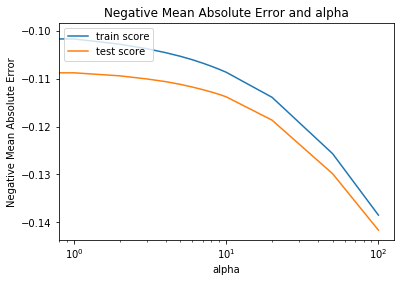

In [61]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [62]:
#Finding best alpha

Ridge_alpha = model_cv.best_params_
print(Ridge_alpha)

{'alpha': 0.2}


In [63]:
# Using best alpha to find ridge coeffients

alpha = 0.2


ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_test,y_test_pred))


[-0.06510687  0.34162528  0.07254159  0.19389364  0.45538758  0.27922714
  0.50448856  0.15257666  0.05564919  0.18306283  0.05031681  0.00442766
 -0.17493986  0.16382861  0.13772309  0.11532571  0.0935998   0.09488081
  0.08198158 -0.38822747 -0.0339883  -0.0940908  -0.05413253  0.050371
 -0.04245987  0.06727604  0.13846288  0.05787245  0.07997902 -0.05994754
  0.08512547 -0.04028572 -0.08019879 -0.09774447 -0.07988291  0.03754637
  0.0577232  -0.09774447 -0.0577804  -0.07139827  0.03889997  0.03988264
 -0.04637361 -0.16375973 -0.06325307 -0.16375973  0.05919099  0.16736552
 -0.2931018  -0.15652498]
0.8603031983944418
0.8223203616546456


In [64]:
# list of alphas to tune

params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,  4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 



Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [65]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004769,0.006449,0.004737,0.006288,0.001,{'alpha': 0.001},-0.103786,-0.109814,-0.110995,-0.109299,-0.116066,-0.109986,0.003925,1,-0.106405,-0.099049,-0.101396,-0.106494,-0.106550,-0.103979,0.003156
1,0.004725,0.006268,0.000000,0.000000,0.01,{'alpha': 0.01},-0.144679,-0.152234,-0.153638,-0.152375,-0.166833,-0.153943,0.007178,2,-0.150861,-0.152164,-0.148272,-0.151813,-0.148244,-0.150271,0.001698
2,0.006488,0.007953,0.000000,0.000000,0.05,{'alpha': 0.05},-0.246174,-0.242887,-0.238446,-0.234690,-0.245369,-0.241518,0.004346,3,-0.241536,-0.238800,-0.241818,-0.239287,-0.240656,-0.240419,0.001197
3,0.006167,0.006125,0.003891,0.006052,0.1,{'alpha': 0.1},-0.302987,-0.304302,-0.298171,-0.284547,-0.319731,-0.301949,0.011307,4,-0.299074,-0.300666,-0.302373,-0.301960,-0.301642,-0.301143,0.001178
4,0.010248,0.008402,0.000000,0.000000,0.2,{'alpha': 0.2},-0.312646,-0.312179,-0.306816,-0.295412,-0.325987,-0.310610,0.009879,5,-0.310026,-0.309197,-0.310983,-0.313371,-0.306761,-0.310068,0.002165


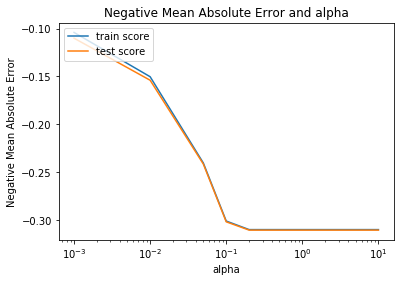

In [66]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [67]:
#Finding best alpha for lasso

lasso_alpha = model_cv.best_params_
print(lasso_alpha)

{'alpha': 0.001}


In [68]:
# Using best alpha to find Lasso coeffients

alpha = 0.001


lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
L1 = lasso.coef_
print(L1)


y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_test,y_test_pred))


[-0.00000000e+00  0.00000000e+00  6.18640161e-02  0.00000000e+00
  1.38998912e-01  0.00000000e+00  9.42784305e-01  1.24827918e-01
  0.00000000e+00  1.54867681e-01  4.12324918e-02  9.92190896e-03
 -5.74217421e-02  1.02043408e-01  1.71849695e-01  9.01707564e-02
  0.00000000e+00  0.00000000e+00  3.13360412e-02 -0.00000000e+00
 -5.68009133e-03 -3.12551762e-02 -4.81419095e-02  5.50974384e-02
 -3.00612153e-02  6.84609603e-02  1.31622955e-01  4.40398187e-02
  6.49647210e-02  0.00000000e+00  1.90338690e-02 -9.76804209e-03
 -5.33596902e-02 -2.00190752e-01 -6.61929258e-02  4.76452769e-02
  6.39945548e-02 -1.47008643e-04 -3.81044063e-02 -6.39261521e-02
  2.46841736e-02  4.23788883e-02 -4.60952424e-02 -3.25245969e-01
 -4.40589191e-02 -3.97627174e-03  4.65555637e-02  1.62181407e-01
 -2.32385904e-01 -1.64356919e-01]
0.8498058859067559
0.8229835279075499


In [69]:
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  6.18640161e-02,  0.00000000e+00,
        1.38998912e-01,  0.00000000e+00,  9.42784305e-01,  1.24827918e-01,
        0.00000000e+00,  1.54867681e-01,  4.12324918e-02,  9.92190896e-03,
       -5.74217421e-02,  1.02043408e-01,  1.71849695e-01,  9.01707564e-02,
        0.00000000e+00,  0.00000000e+00,  3.13360412e-02, -0.00000000e+00,
       -5.68009133e-03, -3.12551762e-02, -4.81419095e-02,  5.50974384e-02,
       -3.00612153e-02,  6.84609603e-02,  1.31622955e-01,  4.40398187e-02,
        6.49647210e-02,  0.00000000e+00,  1.90338690e-02, -9.76804209e-03,
       -5.33596902e-02, -2.00190752e-01, -6.61929258e-02,  4.76452769e-02,
        6.39945548e-02, -1.47008643e-04, -3.81044063e-02, -6.39261521e-02,
        2.46841736e-02,  4.23788883e-02, -4.60952424e-02, -3.25245969e-01,
       -4.40589191e-02, -3.97627174e-03,  4.65555637e-02,  1.62181407e-01,
       -2.32385904e-01, -1.64356919e-01])

### Ridge R2 Scores

Ridge - Train - 0.86
Ridge - Test - 0.822

### Lasso R2 SCores:
Lasso - Train - 0.849
Lasso - Test - 0.822

In [70]:
## Zipping columns names with Ridge Coefficients, created a Dataframe and sorted to find top 10 features

Ridge_df = pd.DataFrame(list(zip(X_train.columns,ridge.coef_)))
Ridge_df.rename(columns = {0: 'Column', 1: 'Ridge_Coeff'}, inplace = True)
Ridge_df = Ridge_df[Ridge_df['Ridge_Coeff'] != 0.000000]
Ridge_df.sort_values(by = 'Ridge_Coeff', ascending = False).head(10)               

,Column,Ridge_Coeff
6,GrLivArea,0.504489
4,1stFlrSF,0.455388
1,LotArea,0.341625
5,2ndFlrSF,0.279227
3,TotalBsmtSF,0.193894
9,FullBath,0.183063
47,GarageCars_Others_GarageCars,0.167366
13,TotRmsAbvGrd,0.163829
7,BsmtFullBath,0.152577
26,OverallQual_8,0.138463


In [71]:
## Zipping columns names with Lasso Coefficients, created a Dataframe and sorted to find top 10 features

Lasso_df = pd.DataFrame(list(zip(X_train.columns,lasso.coef_)))
Lasso_df.rename(columns = {0: 'Column', 1: 'Lasso_Coeff'}, inplace = True)
Lasso_df = Lasso_df[Lasso_df['Lasso_Coeff'] != 0.000000]
Lasso_df.sort_values(by = 'Lasso_Coeff', ascending = False).head(10)            

,Column,Lasso_Coeff
6,GrLivArea,0.942784
14,Fireplaces,0.171850
47,GarageCars_Others_GarageCars,0.162181
9,FullBath,0.154868
4,1stFlrSF,0.138999
26,OverallQual_8,0.131623
7,BsmtFullBath,0.124828
13,TotRmsAbvGrd,0.102043
15,WoodDeckSF,0.090171
25,OverallQual_7,0.068461


In [72]:
print(len(Ridge_df))
len(Lasso_df)

50


41

### 1. Subjective question 1

In [73]:
alpha = 0.2*2


ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_test,y_test_pred))


[-0.05967039  0.31381425  0.07741945  0.20579288  0.43493051  0.272248
  0.47607507  0.15271521  0.05431451  0.1872828   0.05248188  0.00470154
 -0.1710448   0.17433803  0.14031331  0.11671461  0.08917338  0.09138
  0.08087086 -0.35247254 -0.03347859 -0.09256025 -0.05485944  0.05024944
 -0.04312216  0.06849208  0.13960992  0.05773233  0.07965294 -0.05498812
  0.08025096 -0.0400754  -0.07987721 -0.09696681 -0.08065864  0.03858062
  0.05812568 -0.09696681 -0.05793329 -0.0720964   0.03865265  0.04018593
 -0.04735674 -0.1646514  -0.06207584 -0.1646514   0.05965183  0.16792576
 -0.28296785 -0.15702229]
0.8601324715411895
0.8228762623037701


In [74]:
alpha =0.001*2


lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
L2 = lasso.coef_
print(L2)

y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_test,y_test_pred))


[ 0.          0.          0.03314544  0.          0.16896944  0.
  0.84133537  0.09502339  0.          0.1266918   0.03094279  0.01458406
 -0.          0.05985623  0.1970169   0.05699588  0.          0.
  0.         -0.         -0.         -0.         -0.04599294  0.05865894
 -0.01657425  0.05861483  0.12241913  0.02986424  0.04710104  0.
  0.01186938 -0.         -0.03331243 -0.16451565 -0.05314528  0.05026017
  0.07287194 -0.         -0.01929873 -0.05906442  0.0130195   0.04413732
 -0.04439327 -0.31360215 -0.02703482 -0.00243986  0.03455313  0.15215914
 -0.20379454 -0.17372154]
0.8391058090250976
0.811161089159186


In [75]:
## Zipping columns names with Ridge Coefficients, created a Dataframe and sorted to find top 10 features

Ridge_df = pd.DataFrame(list(zip(X_train.columns,ridge.coef_)))
Ridge_df.rename(columns = {0: 'Column', 1: 'Ridge_Coeff'}, inplace = True)
Ridge_df = Ridge_df[Ridge_df['Ridge_Coeff'] != 0.000000]
Ridge_df.sort_values(by = 'Ridge_Coeff', ascending = False).head(10)               


,Column,Ridge_Coeff
6,GrLivArea,0.476075
4,1stFlrSF,0.434931
1,LotArea,0.313814
5,2ndFlrSF,0.272248
3,TotalBsmtSF,0.205793
9,FullBath,0.187283
13,TotRmsAbvGrd,0.174338
47,GarageCars_Others_GarageCars,0.167926
7,BsmtFullBath,0.152715
14,Fireplaces,0.140313


In [76]:
## Zipping columns names with Lasso Coefficients, created a Dataframe and sorted to find top 10 features
# Ignoring columns with 0 coeffieicients

Lasso_df = pd.DataFrame(list(zip(X_train.columns,lasso.coef_)))
Lasso_df.rename(columns = {0: 'Column', 1: 'Lasso_Coeff'}, inplace = True)
Lasso_df = Lasso_df[Lasso_df['Lasso_Coeff'] != 0.000000]
Lasso_df.sort_values(by = 'Lasso_Coeff', ascending = False).head(10)            

,Column,Lasso_Coeff
6,GrLivArea,0.841335
14,Fireplaces,0.197017
4,1stFlrSF,0.168969
47,GarageCars_Others_GarageCars,0.152159
9,FullBath,0.126692
26,OverallQual_8,0.122419
7,BsmtFullBath,0.095023
36,BsmtFinType1_Good Living Quarters,0.072872
13,TotRmsAbvGrd,0.059856
23,MSZoning_RL,0.058659


In [77]:
len(Ridge_df)

50

In [78]:
# Left with 35 variables after Lasso

len(Lasso_df)

35

### Ridge R2 Scores for doubled alpha:

Ridge - Train - 0.86
Ridge - Test - 0.822

### Lasso R2 SCores:
Lasso - Train - 0.839
Lasso - Test - 0.811

#### 3. Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [79]:
X_train_lasso = X_train.drop(['GrLivArea','Fireplaces','1stFlrSF','GarageCars_Others_GarageCars','FullBath'], axis = 1)
X_train_lasso.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', '2ndFlrSF',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_Other_Sub_class', 'MSZoning_RL',
       'Neighborhood_OldTown', 'OverallQual_7', 'OverallQual_8',
       'OverallCond_6', 'OverallCond_7', 'Exterior1st_MetalSd',
       'Exterior2nd_MetalSd', 'MasVnrType_Stone_BrkCmn',
       'BsmtQual_Good (90-99 inches)', 'BsmtQual_No Basement',
       'BsmtQual_Typical (80-89 inches)', 'BsmtExposure_Good_Minimum',
       'BsmtFinType1_Good Living Quarters', 'BsmtFinType1_No Basement',
       'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Fa_Ex_Po',
       'FireplaceQu_Good - Masonry Fireplace in main level',
       'GarageType_Detached from home', 'GarageType_No Garage',
       'GarageType_Other_Garage', 'GarageFinish_No Garage', 'GarageCars_

In [80]:
X_test_lasso = X_test.drop(['GrLivArea','Fireplaces','1stFlrSF','GarageCars_Others_GarageCars','FullBath'], axis = 1)
X_test_lasso.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', '2ndFlrSF',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_Other_Sub_class', 'MSZoning_RL',
       'Neighborhood_OldTown', 'OverallQual_7', 'OverallQual_8',
       'OverallCond_6', 'OverallCond_7', 'Exterior1st_MetalSd',
       'Exterior2nd_MetalSd', 'MasVnrType_Stone_BrkCmn',
       'BsmtQual_Good (90-99 inches)', 'BsmtQual_No Basement',
       'BsmtQual_Typical (80-89 inches)', 'BsmtExposure_Good_Minimum',
       'BsmtFinType1_Good Living Quarters', 'BsmtFinType1_No Basement',
       'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Fa_Ex_Po',
       'FireplaceQu_Good - Masonry Fireplace in main level',
       'GarageType_Detached from home', 'GarageType_No Garage',
       'GarageType_Other_Garage', 'GarageFinish_No Garage', 'GarageCars_

In [81]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,  4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso, y_train) 



Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [82]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008214,0.004647,0.003955,0.002082,0.001,{'alpha': 0.001},-0.104909,-0.119182,-0.121710,-0.121918,-0.125845,-0.118699,0.007233,1,-0.117290,-0.106949,-0.111209,-0.114811,-0.116007,-0.113253,0.003748
1,0.008429,0.002997,0.001502,0.002036,0.01,{'alpha': 0.01},-0.154965,-0.163923,-0.166158,-0.162437,-0.171473,-0.163783,0.005378,2,-0.162416,-0.160651,-0.158308,-0.160656,-0.157974,-0.160001,0.001653
2,0.006814,0.004181,0.003540,0.002207,0.05,{'alpha': 0.05},-0.246174,-0.242887,-0.238446,-0.234690,-0.245369,-0.241518,0.004346,3,-0.241536,-0.238800,-0.241818,-0.239287,-0.240656,-0.240419,0.001197
3,0.006568,0.004173,0.003054,0.003725,0.1,{'alpha': 0.1},-0.302987,-0.304302,-0.298171,-0.284547,-0.319731,-0.301949,0.011307,4,-0.299074,-0.300666,-0.302373,-0.301960,-0.301642,-0.301143,0.001178
4,0.003357,0.002487,0.001907,0.003108,0.2,{'alpha': 0.2},-0.312646,-0.312179,-0.306816,-0.295412,-0.325987,-0.310610,0.009879,5,-0.310026,-0.309197,-0.310983,-0.313371,-0.306761,-0.310068,0.002165


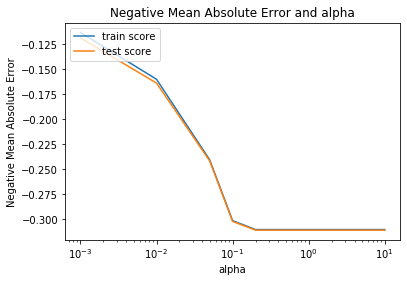

In [83]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [84]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [85]:
# Building Lasso and Checking R2 for lasso 

alpha =0.001


lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train) 
L1 = lasso.coef_
print(L1)


y_train_pred = lasso.predict(X_train_lasso)
print(metrics.r2_score(y_train, y_train_pred))
y_test_pred = lasso.predict(X_test_lasso)
print(metrics.r2_score(y_test,y_test_pred))


[ 0.          0.00733794  0.16799775  0.98845954  0.27827965  0.12957653
  0.          0.02246201  0.00783879 -0.08715721  0.47105339  0.13654529
  0.          0.          0.0309183  -0.         -0.00219019 -0.02247964
 -0.042577    0.06254667 -0.01322668  0.09096567  0.17566719  0.05138894
  0.06210295  0.          0.0142762  -0.01195795 -0.06786313 -0.04307081
 -0.0999678   0.06655953  0.05764559 -0.         -0.0542062  -0.09247948
  0.0833265   0.08658813 -0.07284515 -0.21467926 -0.02827865 -0.00255212
  0.01882541 -0.21814819 -0.17906534]
0.8261960712897036
0.7884790571101123


In [86]:
# Ignoring columns with 0 coeffieicients

Lasso_df = pd.DataFrame(list(zip(X_train_lasso.columns,lasso.coef_)))
Lasso_df.rename(columns = {0: 'Column', 1: 'Lasso_Coeff'}, inplace = True)
Lasso_df = Lasso_df[Lasso_df['Lasso_Coeff'] != 0.000000]
Lasso_df.sort_values(by = 'Lasso_Coeff', ascending = False).head(10)            

,Column,Lasso_Coeff
3,TotalBsmtSF,0.988460
10,TotRmsAbvGrd,0.471053
4,2ndFlrSF,0.278280
22,OverallQual_8,0.175667
2,MasVnrArea,0.167998
11,WoodDeckSF,0.136545
5,BsmtFullBath,0.129577
21,OverallQual_7,0.090966
37,FireplaceQu_Good - Masonry Fireplace in main l...,0.086588
36,FireplaceQu_Fa_Ex_Po,0.083327


In [87]:
# 38 Columns are left after feature engineering by Lasso

len(Lasso_df)

38

R2 Scores for both Ridge and Lasso are shown below:
Ridge R2 Scores for optimal alpha:
Ridge - Train – 0.86
Ridge - Test - 0.822
Lasso R2 Scores for optimal alpha:
Lasso - Train - 0.849
Lasso - Test - 0.822
Since the R2 Square difference between Test for both Ridge and Lasso is none, selecting one would be based on advantages.
I prefer Lasso over Ridge as it gives a simpler model by reducing the coefficients of irrelevant variables to absolute 0. Thus makes the model having fewer variables than we started with. These final set of variables are deemed as important by Lasso. Ridge never sets coefficients to absolute 0 though unimportant.  Thus Lasso makes feature selection easy for us.